In [1]:
selected_datasets = ['FreeSolv',
                        'ESOL',
                         'qm7',
                        'Lipo',
                        'BACE',
                        'BBBP',
                        'sider',
                        'tox21']

In [2]:
selected_datasets_lower = [x.lower() for x in selected_datasets]

In [ ]:
pretrained_gin_sider_scaffold__random_maskingRecon+predict_acc.py

In [139]:
file = 'finetuneReconPrintRatio.py'

In [140]:
base_path = '/tf/MolCLR-master - copy2/experiments'

In [141]:
import os
import pandas as pd 

results_df = pd.DataFrame()  # 결과를 저장할 빈 데이터 프레임 생성

for dataset in selected_datasets_lower:
    file_name = 'pretrained_gin_{}_scaffold_random_masking{}.csv'.format(dataset,file)
    file_path = os.path.join(base_path ,file_name)
    
    
    if os.path.isfile(file_path):
        print(file_path)
        
        temp_df  = pd.read_csv(file_path)

        grouped = temp_df.groupby('mask_rate')['result'].agg(['mean', 'std']).reset_index()
        
        grouped['Dataset'] = dataset
        
        # 결과 데이터 프레임에 추가
        results_df = pd.concat([results_df, grouped], ignore_index=True)
    else:
        print(f"{file_path} 파일이 존재하지 않습니다.")

# 결과 데이터 프레임의 열 이름 변경
results_df.columns = ['mask_rate', 'Mean Result', 'Stddev Result', 'Dataset']

# 최종 결과 출력
print(results_df)

/tf/MolCLR-master - copy2/experiments/pretrained_gin_freesolv_scaffold_random_maskingfinetuneReconPrintRatio.py.csv
/tf/MolCLR-master - copy2/experiments/pretrained_gin_esol_scaffold_random_maskingfinetuneReconPrintRatio.py.csv
/tf/MolCLR-master - copy2/experiments/pretrained_gin_qm7_scaffold_random_maskingfinetuneReconPrintRatio.py.csv
/tf/MolCLR-master - copy2/experiments/pretrained_gin_lipo_scaffold_random_maskingfinetuneReconPrintRatio.py.csv
/tf/MolCLR-master - copy2/experiments/pretrained_gin_bace_scaffold_random_maskingfinetuneReconPrintRatio.py.csv
/tf/MolCLR-master - copy2/experiments/pretrained_gin_bbbp_scaffold_random_maskingfinetuneReconPrintRatio.py.csv
/tf/MolCLR-master - copy2/experiments/pretrained_gin_sider_scaffold_random_maskingfinetuneReconPrintRatio.py.csv
/tf/MolCLR-master - copy2/experiments/pretrained_gin_tox21_scaffold_random_maskingfinetuneReconPrintRatio.py.csv
    mask_rate  Mean Result  Stddev Result   Dataset
0         0.1     3.140546       0.314786  free

In [142]:
df = pd.DataFrame(results_df)

bace
bbbp
esol
freesolv
lipo
qm7
sider
tox21


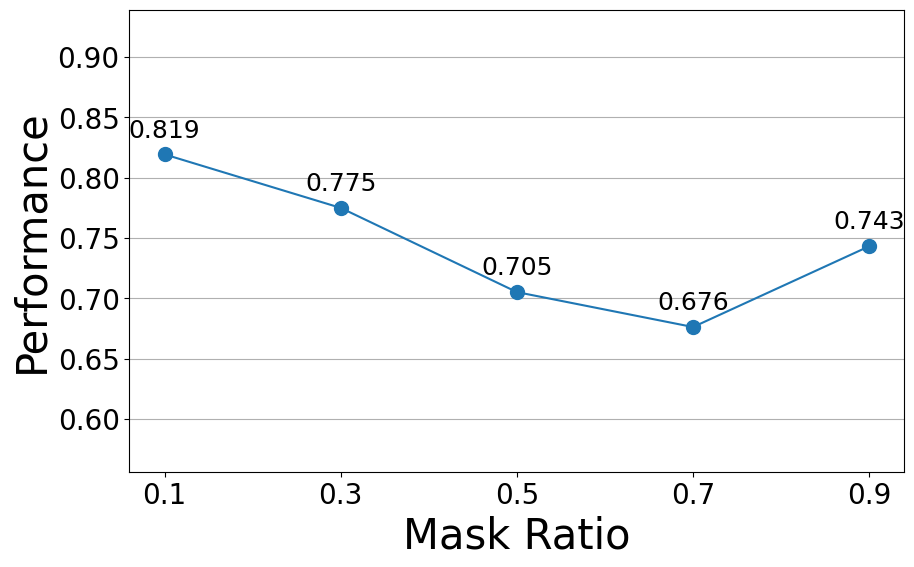

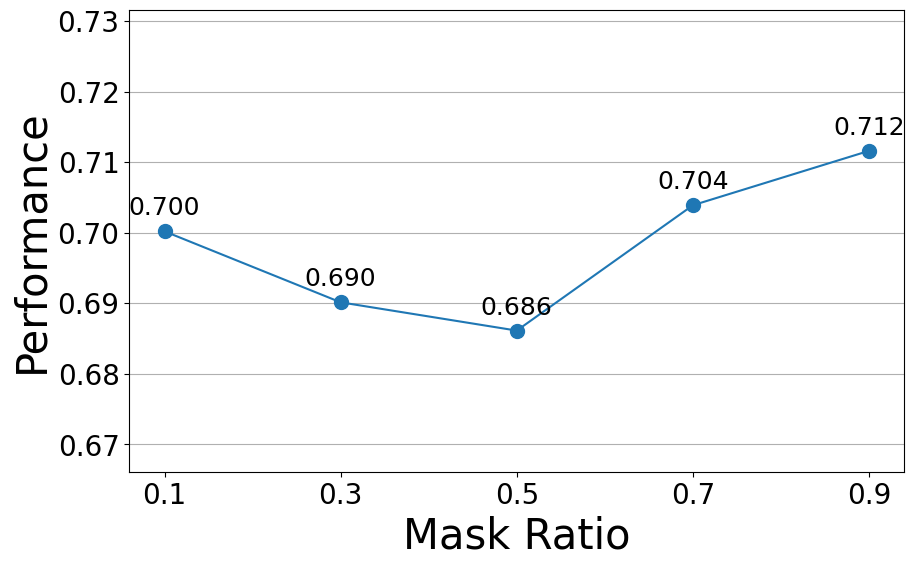

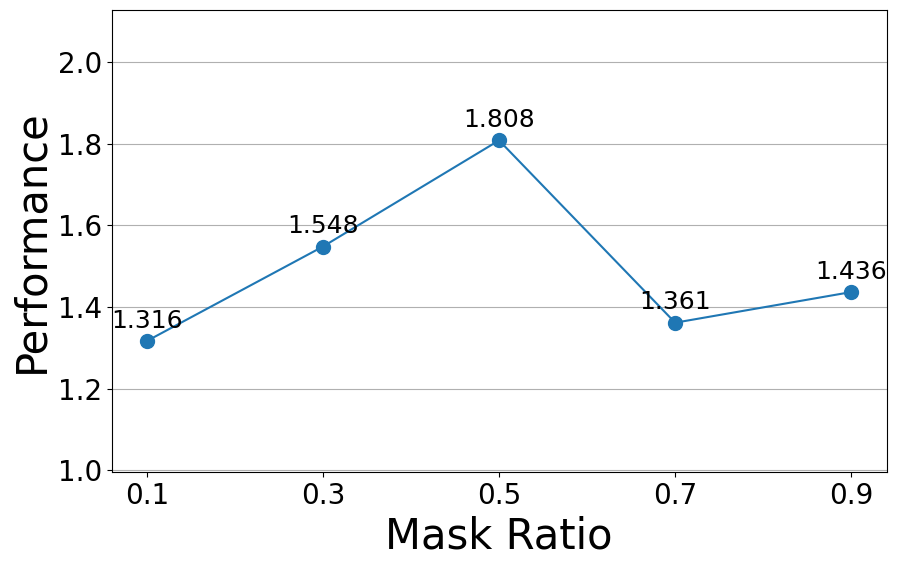

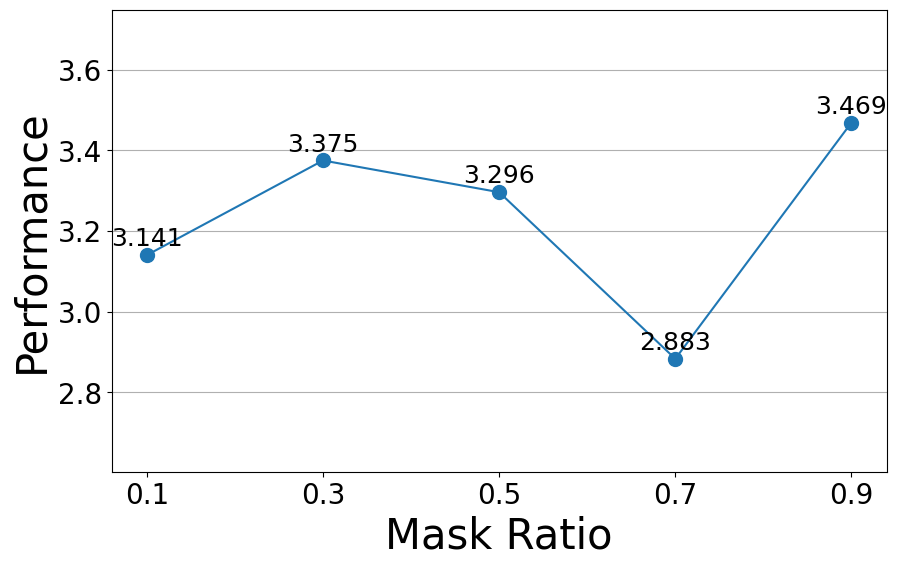

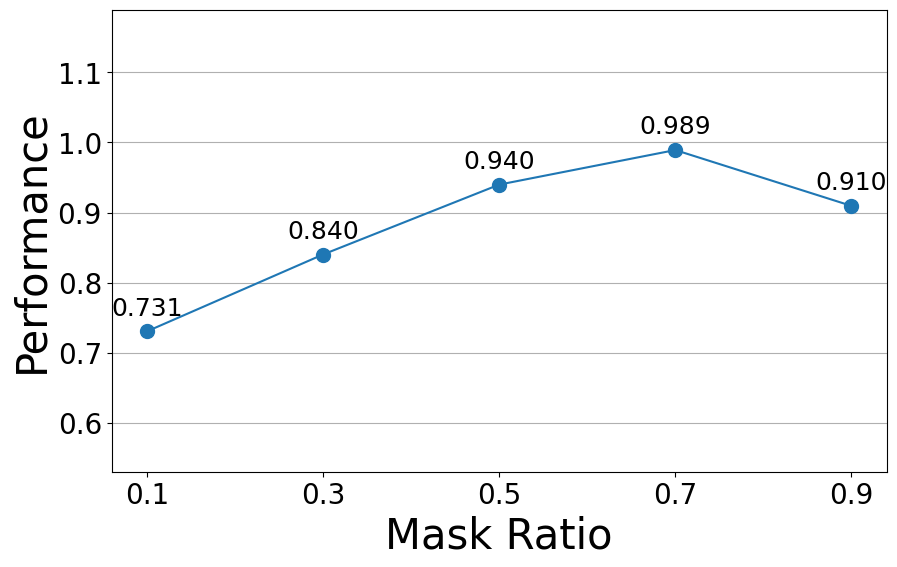

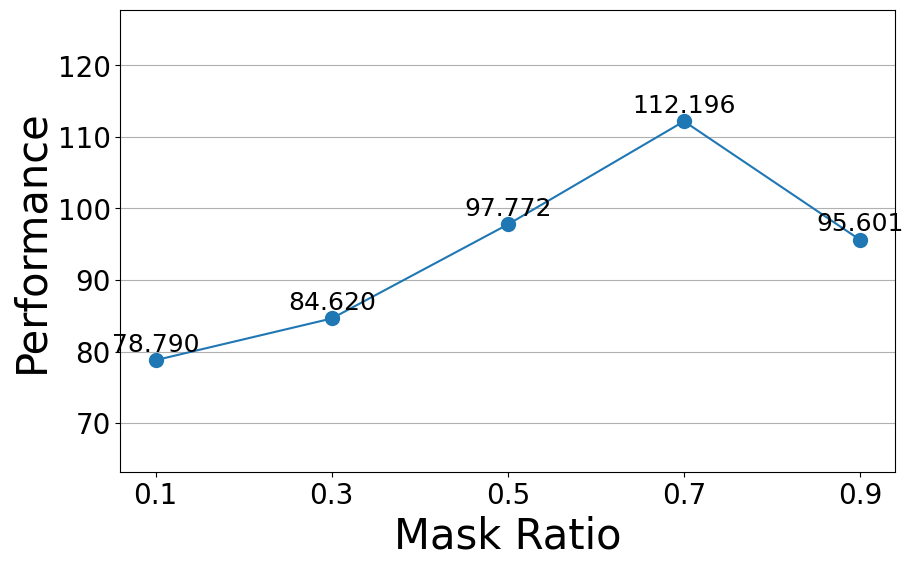

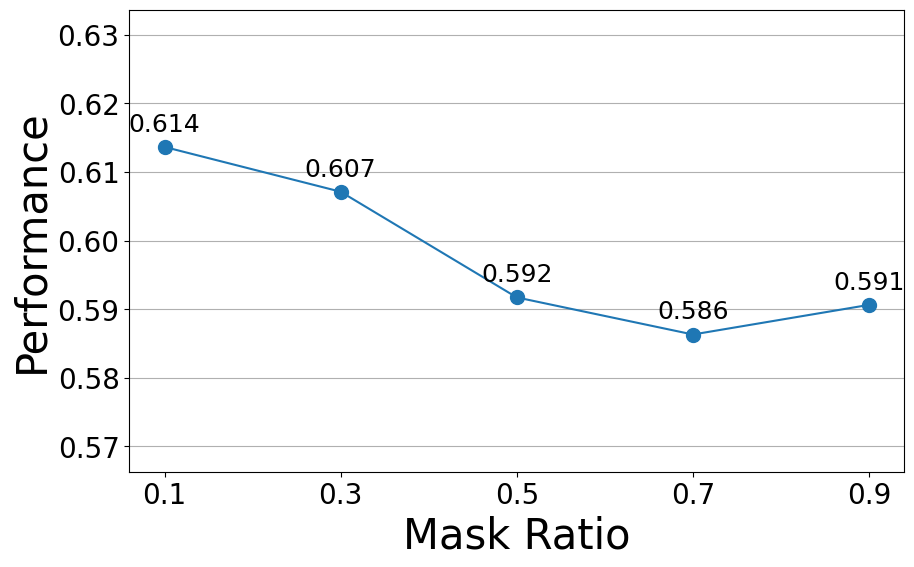

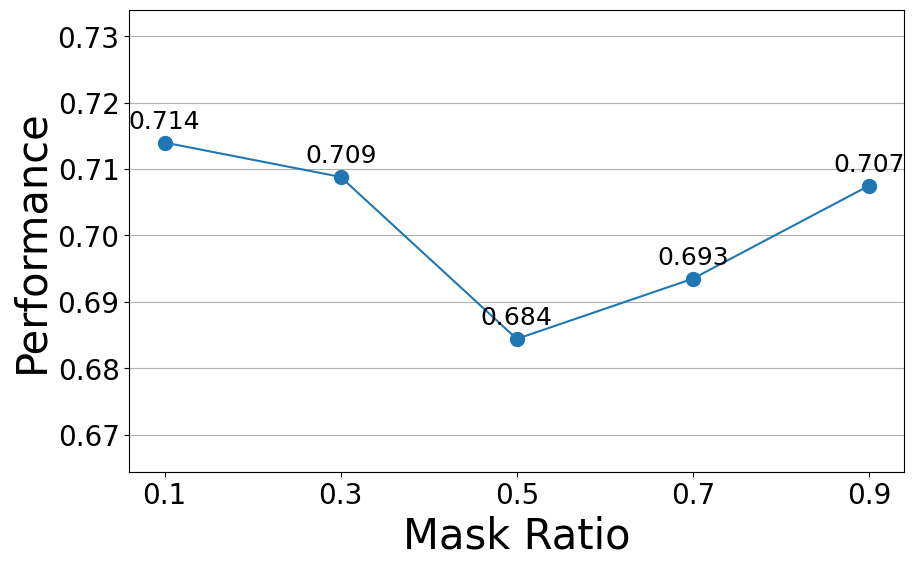

In [145]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame(results_df)
# 그룹화하여 각 데이터셋에 대한 꺾은선 그래프 그리기
for name, group in df.groupby('Dataset'):
    print(name)
    plt.figure(figsize=(10, 6))
    plt.plot(group['mask_rate'], group['Mean Result'], marker='o', markersize=10)
    # plt.title(f'Mean Result by Mask Rate for {name}')
    plt.xlabel('Mask Ratio',fontsize= 30)
    plt.ylabel('Performance', fontsize= 30)

    add_y = { 'bace': 0.03, 'bbbp': 0.005, 'esol': 0.08, 'freesolv':0.07, 'sider':0.005, 'tox21':0.005, 'qm7':3.9, 'lipo':0.05}
    
    for x, y in zip(group['mask_rate'], group['Mean Result']):
        plt.text(x, y+add_y[name], f'{y:.3f}', color='black', ha='center', va='top', size = 18)  # 값은 소수점 둘째자리까지 표시
        
    # y축 범위 설정
    y_min = group['Mean Result'].min() - add_y[name] * 4
    y_max = group['Mean Result'].max() + add_y[name] * 4
    plt.ylim(y_min, y_max)

    
    plt.xticks([0.1, 0.3, 0.5, 0.7, 0.9], fontsize=20)
    plt.yticks(fontsize = 20)

        # 가로선만 있는 그리드 표시
    plt.grid(True, axis='y')  
    plt.savefig(f"./ratio/{name}_plot.png", dpi=600, bbox_inches='tight')  # 파일 형식, 해상도 및 경계 조정 옵션 포함
    # plt.show()

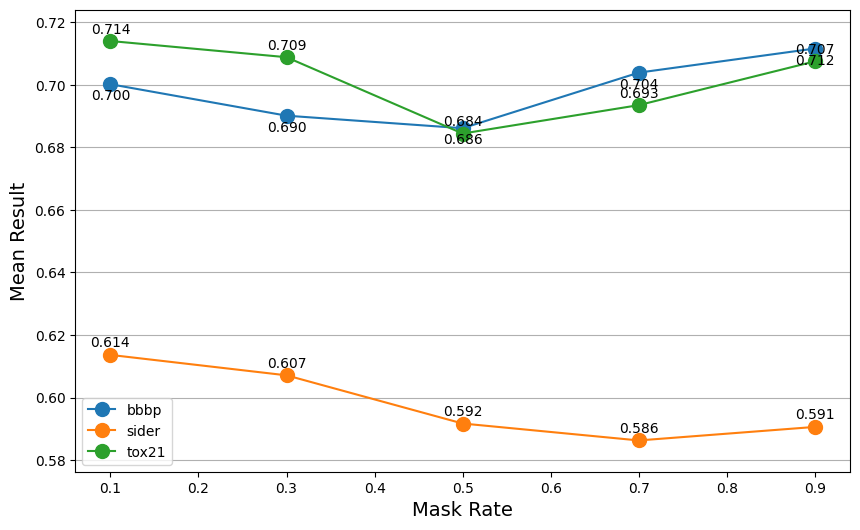

In [104]:
import pandas as pd
import matplotlib.pyplot as plt

# 예시 데이터 프레임
# results_df = ...

df = pd.DataFrame(results_df)

# bace와 bbbp 데이터 필터링
filtered_df = df[df['Dataset'].isin([ 'bbbp', 'sider', 'tox21'])]

# 그룹화하여 꺾은선 그래프 그리기
plt.figure(figsize=(10, 6))

baseline = { 'bbbp': 0.6853, 'bace': 0.8261, 'sider':0.5971, 'tox21': 0.7035, 'esol': 1.3285, 'freesolv': 2.9214, 'qm7':76.7963, 'lipo': 0.7459}

for name, group in filtered_df.groupby('Dataset'):
    plt.plot(group['mask_rate'], group['Mean Result'], marker='o', markersize=10, label=name)
    for x, y in zip(group['mask_rate'], group['Mean Result']):
        if name == 'bbbp':
            plt.text(x, y - 0.006, f'{y:.3f}', color='black', ha='center', va='bottom', size=10)  # 값은 소수점 둘째자리까지 표시
        else:
            plt.text(x, y + 0.006 , f'{y:.3f}', color='black', ha='center', va='top', size=10)  # 값은 소수점 둘째자리까지 표시
    

plt.xlabel('Mask Rate', fontsize=14)
plt.ylabel('Mean Result', fontsize=14)

# y축 범위 설정
y_min = filtered_df['Mean Result'].min() - 0.01
y_max = filtered_df['Mean Result'].max() + 0.01
plt.ylim(y_min, y_max)

# 가로선만 있는 그리드 표시
plt.grid(True, axis='y')

# 범례 추가
plt.legend()

plt.savefig(f"./ratio/plot.png", dpi=600, bbox_inches='tight')  # 파일 형식, 해상도 및 경계 조정 옵션 포함
